In [1]:
%matplotlib inline

# House pricing notebook:
<h2>Talble</h2>
    <ul>
        <li>Importing libraries</li>
        <li>Reading the data and replace null an NaN values</li>
        <li>Scaling the data</li>
        <li>Bulding models:</li>
            <ul>
                <li>Linear Regression</li>
                <li>Ridge Regression</li>
                <li>Decision tree</li>
                <li>Random Forest</li>
            </ul>
        <li>Predict the test data</li>
       
       
    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter


from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, f1_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor




import warnings

In [3]:
warnings.filterwarnings('ignore')

## Reading the data

In [4]:
#train data
train_data = pd.read_csv("train.csv")
test_data= pd.read_csv('test.csv')

In [5]:
train_data.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_data.shape

(1460, 81)

In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [10]:
pd.set_option('display.max_rows', 500) 
train_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
print(f'Missing values of LotFrongate in train dataset: {train_data.LotFrontage.isna().sum()/train_data.shape[0]} %')

Missing values of LotFrongate in train dataset: 0.1773972602739726 %


In [12]:
#test data
test_data=pd.read_csv('test.csv')

In [13]:
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [14]:
test_data.shape

(1459, 80)

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [17]:

# pd.set_option('display.max_rows', 500) 
test_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [18]:
train_data.FireplaceQu

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

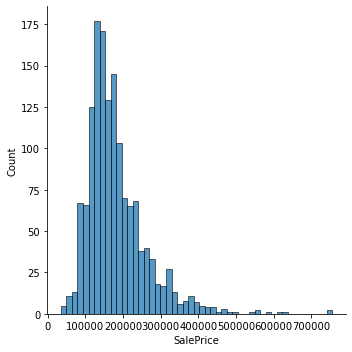

In [19]:
sns.displot(train_data.SalePrice)

In [20]:
train_data[train_data.SalePrice<60000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
710,711,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,52000
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
1325,1326,30,RM,40.0,3636,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,55000
1337,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,52500


In [21]:
train_data = train_data[(train_data.SalePrice <600000) & (train_data.SalePrice >60000)]


In [22]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [23]:
train_data[train_data.SalePrice<600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
train_data[train_data.SalePrice>500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581


### LotFrontage colum:

In [25]:
print(f'Missing values of LotFrongate in test dataset: {test_data.LotFrontage.isna().sum()/test_data.shape[0]} %')

Missing values of LotFrongate in test dataset: 0.15558601782042494 %


Distribution comparasion of the LotFrongate colum :

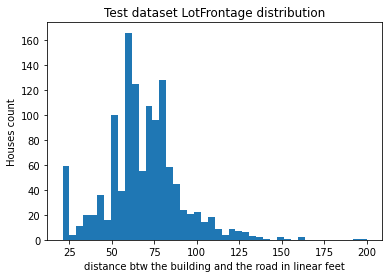

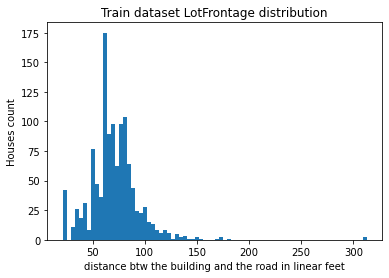

In [26]:
plt.hist(test_data.LotFrontage, bins='fd')
plt.title('Test dataset LotFrontage distribution')
plt.xlabel('distance btw the building and the road in linear feet')
plt.ylabel('Houses count')
plt.show()
plt.hist(train_data.LotFrontage, bins='fd')
plt.title('Train dataset LotFrontage distribution')
plt.xlabel('distance btw the building and the road in linear feet')
plt.ylabel('Houses count')
plt.show()

In [27]:

print(f'Maximal distance in linear feet btw the building and the road in train dataset: {train_data.LotFrontage.max()} feets')
train_data.LotFrontage.mean()
print(f'Mean distance in linear feet btw the building and the road in train dataset: {train_data.LotFrontage.mean()} feets')
train_data.LotFrontage.min()
print(f'Minimal distance in linear feet btw the building and the road in train dataset: {train_data.LotFrontage.min()} feets')


print(f'Maximal distance in linear feet btw the building and the road in test dataset: {test_data.LotFrontage.max()} feets')

print(f'Mean distance in linear feet btw the building and the road in test dataset: {test_data.LotFrontage.mean()} feets')

print(f'Minimal distance in linear feet btw the building and the road in test dataset: {test_data.LotFrontage.min()} feets')

Maximal distance in linear feet btw the building and the road in train dataset: 313.0 feets
Mean distance in linear feet btw the building and the road in train dataset: 69.9737954353339 feets
Minimal distance in linear feet btw the building and the road in train dataset: 21.0 feets
Maximal distance in linear feet btw the building and the road in test dataset: 200.0 feets
Mean distance in linear feet btw the building and the road in test dataset: 68.58035714285714 feets
Minimal distance in linear feet btw the building and the road in test dataset: 21.0 feets


LotFrontage colum is about the linear feet of street connected to property.The destribution in the training and the testing data set is not the same but enough  similar. Missing values count is almost similar. I will fill the missing value with the mean value of the colum of each dataset.

#### Replacing the missing values LotFrontage colum in the both datasets with mean values:

In [28]:
train_data.LotFrontage.fillna(train_data.LotFrontage.mean(), inplace=True)
test_data.LotFrontage.fillna(test_data.LotFrontage.mean(), inplace=True)

In [29]:
train_data.LotFrontage.isna().sum(),  test_data.LotFrontage.isna().sum()

(0, 0)

### Alley colum:

Alley colum description:type of alley access to property. Three type: Grvl -> Gravel,Pave ->Paved, NA ->No alley access
     

In [30]:
print(f'Colum type: {train_data.Alley.dtype}')
print(f'Missing values in train dataset{train_data.Alley.isna().sum()/train_data.shape[0]}%')
print(f'Missing values in test dataset{test_data.Alley.isna().sum()/test_data.shape[0]}%')

Colum type: object
Missing values in train dataset0.9389736477115118%
Missing values in test dataset0.9266620973269363%


Because of the biggest number of missing values I will drop the column in the both dataset

In [31]:
train_data.drop(['Alley'], axis=1,inplace=True)

In [32]:
test_data.drop(['Alley'], axis=1, inplace=True)

### Pool quality, Fence and MiscFeature colums:
		


Repeating the same procedure for those three columns

Colums description:
Pool quality:
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [33]:
print(f'Colum type PoolQC: {train_data.PoolQC.dtype}'),
print(f'Colum type Fence: {train_data.Fence.dtype}'),
print(f'Colum type MiscFeature: {train_data.MiscFeature.dtype}')

Colum type PoolQC: object
Colum type Fence: object
Colum type MiscFeature: object


In [34]:
print(f'Missing values PoolQC in train dataset {train_data.PoolQC.isna().sum()/train_data.shape[0]}%'),
print(f'Missing values PoolQC in test dataset {test_data.PoolQC.isna().sum()/test_data.shape[0]}%'),
print(f'Missing values Fence in train dataset {train_data.Fence.isna().sum()/train_data.shape[0]}%'),
print(f'Missing values Fence in test dataset {test_data.Fence.isna().sum()/test_data.shape[0]}%'),
print(f'Missing values MiscFeature in train dataset {train_data.MiscFeature.isna().sum()/train_data.shape[0]}%'),
print(f'Missing values MiscFeature in test dataset {test_data.MiscFeature.isna().sum()/test_data.shape[0]}%')

Missing values PoolQC in train dataset 0.9958391123439667%
Missing values PoolQC in test dataset 0.997943797121316%
Missing values Fence in train dataset 0.8085991678224688%
Missing values Fence in test dataset 0.8012337217272104%
Missing values MiscFeature in train dataset 0.9639389736477115%
Missing values MiscFeature in test dataset 0.9650445510623715%


In [35]:
train_data.drop(['PoolQC'], axis=1,inplace=True),
test_data.drop(['PoolQC'], axis=1, inplace=True),
train_data.drop(['Fence'], axis=1,inplace=True),
test_data.drop(['Fence'], axis=1, inplace=True),
train_data.drop(['MiscFeature'], axis=1,inplace=True),
test_data.drop(['MiscFeature'], axis=1, inplace=True)

In [36]:
train_data.shape,test_data.shape

((1442, 77), (1459, 76))

###  Fireplace quality  / FireplaceQu colum

Colum description:
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Text(0.5, 1.0, ' Fireplace quality by house price')

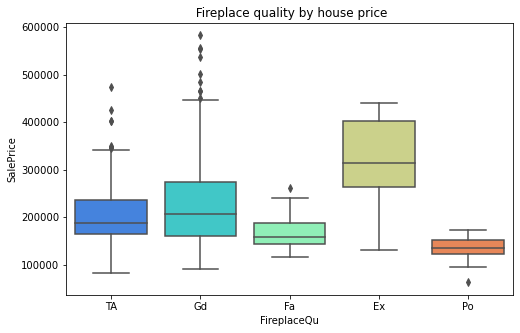

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='FireplaceQu',y='SalePrice',data=train_data, palette='rainbow')
plt.title(" Fireplace quality by house price")

There is a visible correlation btw the price and the Fireplace quality. Unfortunatly half of the values are missing. Meanwhile the colum cannot be ignored. After shot analysis I decided to replace the missing values with the 'Gd'-> or  Masonry Fireplace in main level. Explanation below:

In [38]:
print(f'Missing values FireplaceQu in train dataset {train_data.FireplaceQu.isna().sum()/train_data.shape[0]}%'),
print(f'Missing values FireplaceQu in test dataset {test_data.FireplaceQu.isna().sum()/test_data.shape[0]}%')

Missing values FireplaceQu in train dataset 0.4694868238557559%
Missing values FireplaceQu in test dataset 0.5003427004797807%


In [39]:
#Most repeating value in the colum
print(train_data.FireplaceQu.mode())
#Most repeating value in the colum
print(test_data.FireplaceQu.mode())


0    Gd
dtype: object
0    Gd
dtype: object


In [40]:
#Mean price of the buiding with Po Fireplace quality
print(train_data[train_data.FireplaceQu == 'Po'].SalePrice.mean())

133435.94736842104


In [41]:
#Mean price of the buiding with Gd Fireplace quality
train_data[train_data.FireplaceQu == 'Gd'].SalePrice.mean()

225334.7783641161

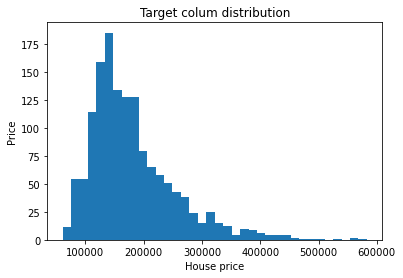

In [42]:
# Distribution the target colum
plt.hist(train_data.SalePrice, bins='fd')
plt.title('Target colum distribution')
plt.xlabel('House price')
plt.ylabel('Price')
plt.show()

In [43]:
print(f'Mean price of the houses in data with no missing values in training dataset {round(train_data[train_data.FireplaceQu.notna()].SalePrice.mean())}')
print(f'Mean price of the houses in train dataset with missing values: {round(train_data[train_data.FireplaceQu.isna()].SalePrice.mean())}')
print(f'Mean price of the houses in train dataset with missing values: {round(train_data[train_data.FireplaceQu.isna()].SalePrice.mean())}')
print(f'Mean price of the houses with  Fair - Prefabricated Fireplace in basement in training dataset : {round(train_data[train_data.FireplaceQu =="Fa"].SalePrice.mean())}')
print(f'Number of houses with FTA    Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement {train_data[train_data.FireplaceQu =="TA" ].shape[0]}')
print(f'Number of houses with  Fa    Fair - Prefabricated Fireplace in basement {train_data[train_data.FireplaceQu =="Fa" ].shape[0]}')
print(f'Mean price of the houses with Po    Poor - Ben Franklin Stove {round(train_data[train_data.FireplaceQu =="Po"].SalePrice.mean())}')
print(f'Minimal price of the houses with missing value for Fireplace {train_data[train_data.FireplaceQu.isna()].SalePrice.min()}')
print(f'Maximal price of the houses with missing value for Fireplace {train_data[train_data.FireplaceQu.isna()].SalePrice.max()}')
print(f'Number of houses with data with missing FireplaceQu where the house pricing is below 161,000$: {train_data[(train_data.FireplaceQu.isna()) & (train_data.SalePrice < 161000)].shape[0]}')
print(f'Total number of houses with missing value for FireplaceQu: {train_data.FireplaceQu.isna().sum()}')
print(f'Average value for FireplaceQu for the houses with pricing below 161,000$ without missing values: {train_data[(train_data.FireplaceQu.notna()) &  (train_data.SalePrice < 161000)].FireplaceQu.mode()}')





Mean price of the houses in data with no missing values in training dataset 214156
Mean price of the houses in train dataset with missing values: 143105
Mean price of the houses in train dataset with missing values: 143105
Mean price of the houses with  Fair - Prefabricated Fireplace in basement in training dataset : 167298
Number of houses with FTA    Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement 311
Number of houses with  Fa    Fair - Prefabricated Fireplace in basement 33
Mean price of the houses with Po    Poor - Ben Franklin Stove 133436
Minimal price of the houses with missing value for Fireplace 61000
Maximal price of the houses with missing value for Fireplace 342643
Number of houses with data with missing FireplaceQu where the house pricing is below 161,000$: 497
Total number of houses with missing value for FireplaceQu: 677
Average value for FireplaceQu for the houses with pricing below 161,000$ without missing values: 0    Gd
dtype: o

In [44]:
train_data.FireplaceQu.fillna(train_data.FireplaceQu.mode(),inplace=True),
test_data.FireplaceQu.fillna(test_data.FireplaceQu.mode(),inplace=True)

In [45]:
train_data.FireplaceQu.isna().sum()


676

In [46]:
test_data.FireplaceQu.isna().sum()

729

In [47]:
train_data.FireplaceQu.fillna('Gd', inplace = True),
test_data.FireplaceQu.fillna('Gd', inplace = True)

In [48]:
train_data.FireplaceQu.isna().sum(),test_data.FireplaceQu.isna().sum()

(0, 0)

In [49]:
train_data.shape,test_data.shape

((1442, 77), (1459, 76))

### Missing values in the colums  : 
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
 
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		

Due to the small amout of the missing values I will replace them with the mode of the mean depending of the type

In [50]:
train_data.GarageType.mode()

0    Attchd
dtype: object

In [51]:
train_data.GarageType.fillna('Attchd', inplace=True)

In [52]:
test_data.GarageType.mode()

0    Attchd
dtype: object

In [53]:
test_data.GarageType.fillna('Attchd', inplace=True)

In [54]:
train_data.GarageYrBlt.mean()

1978.6048210372535

In [55]:
train_data.GarageYrBlt.fillna(round(1978.5061638868744), inplace= True)

In [56]:
test_data.GarageYrBlt.mean()

1977.7212165097756

In [57]:
test_data.GarageYrBlt.fillna(round(1977.7212165097756), inplace= True)

In [58]:
train_data.GarageFinish.mode()

0    Unf
dtype: object

In [59]:
train_data.GarageFinish.fillna('UnF', inplace=True)

In [60]:
test_data.GarageFinish.mode()

0    Unf
dtype: object

In [61]:
test_data.GarageFinish.fillna('UnF', inplace=True)

In [62]:
train_data.GarageCars.mean()

1.7760055478502081

In [63]:
train_data.GarageCars.fillna(round(1.7671232876712328),inplace=True)

In [64]:
test_data.GarageCars.mean()

1.7661179698216736

In [65]:
train_data.GarageCars.fillna(round(1.7661179698216736),inplace=True)

In [66]:


train_data.GarageArea.mean()

475.3266296809986

In [67]:
train_data.GarageArea.fillna(round(472.9801369863014),inplace=True)

In [68]:
test_data.GarageArea.mean()

472.76886145404666

In [69]:
test_data.GarageArea.fillna(round(472.76886145404666),inplace=True)

In [70]:

train_data.GarageQual.mode()

0    TA
dtype: object

In [71]:
train_data.GarageQual.fillna('TA',inplace=True)

In [72]:
test_data.GarageQual.mode()

0    TA
dtype: object

In [73]:
test_data.GarageQual.fillna('TA',inplace=True)

In [74]:
train_data.GarageCond.mode()

0    TA
dtype: object

In [75]:
train_data.GarageCond.fillna('TA',inplace=True)

In [76]:
test_data.GarageCond.mode()

0    TA
dtype: object

In [77]:
test_data.GarageCond.fillna('TA',inplace=True)

### Missing values 
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Due to the small amount of missing value i will repeat the same procedure. It take more time but prevents the data loss.

In [78]:
train_data.BsmtQual.mode()


0    TA
dtype: object

In [79]:
test_data.BsmtQual.mode()

0    TA
dtype: object

In [80]:
train_data.BsmtQual.fillna('TA', inplace=True),
test_data.BsmtQual.fillna('TA', inplace=True)

In [81]:
train_data.BsmtCond.mode()


0    TA
dtype: object

In [82]:
test_data.BsmtCond.mode()

0    TA
dtype: object

In [83]:
train_data.BsmtCond.fillna('TA', inplace=True),
test_data.BsmtCond.fillna('TA', inplace=True)

In [84]:
train_data.BsmtExposure.mode()

0    No
dtype: object

In [85]:
test_data.BsmtExposure.mode()

0    No
dtype: object

In [86]:
train_data.BsmtExposure.fillna('No', inplace=True),
test_data.BsmtExposure.fillna('No', inplace=True)

In [87]:
train_data.BsmtFinType1.mode()

0    Unf
dtype: object

In [88]:


test_data.BsmtFinType1.mode()

0    GLQ
dtype: object

In [89]:
train_data.BsmtExposure.fillna('Unf', inplace=True),
test_data.BsmtExposure.fillna('GLQ', inplace=True)

In [90]:
train_data.BsmtFinSF1.mean()

443.51595006934815

In [91]:
test_data.BsmtFinSF1.mean()

439.2037037037037

In [92]:
train_data.BsmtFinSF1.fillna(round(443.6397260273973), inplace=True),
test_data.BsmtFinSF1.fillna(round(439.2037037037037), inplace=True)

In [93]:
train_data.BsmtFinType2.mode()

0    Unf
dtype: object

In [94]:
test_data.BsmtFinType2.mode()

0    Unf
dtype: object

In [95]:
train_data.BsmtFinType2.fillna('Unf', inplace=True),
test_data.BsmtFinType2.fillna('Unf', inplace=True)

In [96]:
train_data.BsmtFinSF2.mean()

47.13037447988904

In [97]:
test_data.BsmtFinSF2.mean()

52.61934156378601

In [98]:
train_data.BsmtFinSF2.fillna(round(46.549315068493153), inplace=True),
test_data.BsmtFinSF2.fillna(round(52.61934156378601), inplace=True)

In [99]:
train_data.BsmtUnfSF.mean()

568.511095700416

In [100]:
test_data.BsmtUnfSF.mean()

554.2949245541838

In [101]:
train_data.BsmtUnfSF.fillna(round(567.2404109589041), inplace=True),
test_data.BsmtUnfSF.fillna(round(554.2949245541838), inplace=True)

In [102]:
train_data.TotalBsmtSF.mean()

1059.1574202496533

In [103]:
test_data.TotalBsmtSF.mean()

1046.1179698216736

In [104]:
train_data.TotalBsmtSF.fillna(round(1057.4294520547944), inplace=True),
test_data.TotalBsmtSF.fillna(round(1046.1179698216736), inplace=True)

In [105]:
train_data.BsmtFinType1.mode()

0    Unf
dtype: object

In [106]:
test_data.BsmtFinType1.mode()

0    GLQ
dtype: object

In [107]:
train_data.BsmtFinType1.fillna('Unf', inplace=True),
test_data.BsmtFinType1.fillna('GLQ', inplace=True)

In [108]:
train_data.Electrical.mode()

0    SBrkr
dtype: object

In [109]:
test_data.Electrical.mode()

0    SBrkr
dtype: object

In [110]:
train_data.Electrical.fillna('SBrkr', inplace=True),
test_data.Electrical.fillna('SBrkr', inplace=True)

### Missing values in the colums  : 
MasVnrType,
MasVnrArea       


In [111]:
train_data.MasVnrArea.mean()

102.67991631799163

In [112]:
test_data.MasVnrArea.mean()

100.70914127423822

In [113]:
train_data.MasVnrArea.fillna(round(103.68526170798899), inplace=True)

In [114]:
test_data.MasVnrArea.fillna(round(100.70914127423822), inplace=True)

In [115]:
train_data.MasVnrType.mode()

0    None
dtype: object

In [116]:
test_data.MasVnrType.mode()

0    None
dtype: object

In [117]:
train_data.MasVnrType.fillna('None', inplace=True)

In [118]:
test_data.MasVnrType.fillna('None', inplace=True)

### Columns:
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

GarageCars: Size of garage in car capacity

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only   	

In [119]:
train_data.MSZoning.fillna(train_data.MSZoning.mode(), inplace=True)

In [120]:
test_data.MSZoning.fillna(test_data.MSZoning.mode(), inplace=True)

In [121]:
train_data.Exterior1st.fillna(train_data.Exterior1st.mode(), inplace=True)

In [122]:
test_data.Exterior1st.fillna(test_data.Exterior1st.mode(), inplace=True)

In [123]:
train_data.Exterior2nd.fillna(train_data.Exterior2nd.mode(), inplace=True)

In [124]:
test_data.Exterior2nd.fillna(test_data.Exterior2nd.mode(), inplace=True)

In [125]:
train_data.Utilities.fillna(train_data.Utilities.mode(), inplace=True)

In [126]:
test_data.Utilities.fillna(test_data.Utilities.mode(), inplace=True)

In [127]:
train_data.BsmtFullBath.fillna(train_data.BsmtFullBath.mean(), inplace=True)

In [128]:
test_data.BsmtFullBath.fillna(test_data.BsmtFullBath.mean(), inplace=True)

In [129]:
train_data.BsmtHalfBath.fillna(train_data.BsmtHalfBath.mean(), inplace=True)

In [130]:
test_data.BsmtHalfBath.fillna(test_data.BsmtHalfBath.mean(), inplace=True)

In [131]:
train_data.GarageCars.fillna(train_data.GarageCars.mean(), inplace=True)

In [132]:
test_data.GarageCars.fillna(test_data.GarageCars.mean(), inplace=True)

In [133]:
train_data.SaleType.fillna(train_data.SaleType.mode(), inplace=True)     

In [134]:
test_data.SaleType.fillna(test_data.SaleType.mode(), inplace=True)

In [135]:
train_data.KitchenQual.fillna(train_data.KitchenQual.mode(), inplace=True)     

In [136]:
test_data.KitchenQual.fillna(test_data.KitchenQual.mode(), inplace=True)

In [137]:
train_data.Functional.fillna(train_data.Functional.mode(), inplace=True)     

In [138]:
test_data.Functional.fillna(test_data.Functional.mode(), inplace=True)

In [139]:
train_data.isna().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

The data has no more Null or NaN values and it is ready to be scaled.

In [140]:
train_data.shape,test_data.shape

((1442, 77), (1459, 76))

## Defining the target colum:


In [141]:
X = train_data.drop('SalePrice', axis = 1)
Y = train_data['SalePrice']

In [142]:
train_data_numerical = train_data.select_dtypes(include=['int64', 'float64'])
train_data_categorical = train_data.select_dtypes(include=['object'])

In [143]:
"""Correlaton plot of the numerical variables"""
df =train_data_numerical
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.02,-0.03,-0.03,0.02,-0.01,-0.02,-0.06,-0.01,-0.00,-0.01,-0.02,0.01,0.00,-0.04,0.01,-0.00,-0.02,0.00,0.01,0.04,0.00,0.03,-0.02,-0.00,0.02,0.02,-0.03,0.00,0.00,-0.05,0.00,0.05,-0.01,0.03,0.00,-0.03
MSSubClass,0.01,1.00,-0.37,-0.14,0.03,-0.07,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.26,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.03,0.27,0.03,-0.05,0.08,-0.04,-0.10,-0.02,-0.00,-0.01,-0.04,-0.03,0.01,-0.02,-0.02,-0.02,-0.09
LotFrontage,-0.02,-0.37,1.00,0.31,0.22,-0.06,0.11,0.08,0.17,0.20,0.04,0.12,0.35,0.41,0.05,0.04,0.35,0.09,-0.01,0.17,0.04,0.23,-0.01,0.31,0.23,0.06,0.26,0.32,0.07,0.14,0.02,0.06,0.04,0.16,0.00,0.01,0.02,0.32
LotArea,-0.03,-0.14,0.31,1.00,0.09,-0.01,0.01,0.01,0.09,0.21,0.11,-0.00,0.25,0.29,0.04,0.00,0.26,0.16,0.05,0.12,0.01,0.11,-0.02,0.18,0.27,-0.03,0.15,0.17,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,-0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.22,0.09,1.00,-0.12,0.56,0.54,0.40,0.21,-0.06,0.31,0.52,0.45,0.28,-0.03,0.57,0.10,-0.05,0.54,0.26,0.07,-0.19,0.40,0.39,0.52,0.59,0.55,0.22,0.32,-0.11,0.03,0.06,0.04,-0.03,0.07,-0.02,0.79
OverallCond,0.02,-0.07,-0.06,-0.01,-0.12,1.00,-0.40,0.06,-0.14,-0.05,0.04,-0.14,-0.19,-0.16,0.02,0.02,-0.10,-0.06,0.12,-0.21,-0.07,-0.00,-0.09,-0.07,-0.03,-0.32,-0.21,-0.17,-0.01,-0.04,0.07,0.02,0.05,0.00,0.07,-0.01,0.05,-0.10
YearBuilt,-0.01,0.03,0.11,0.01,0.56,-0.40,1.00,0.59,0.31,0.24,-0.05,0.15,0.38,0.27,-0.00,-0.19,0.18,0.18,-0.04,0.46,0.23,-0.09,-0.18,0.08,0.14,0.78,0.53,0.47,0.22,0.20,-0.39,0.03,-0.05,-0.00,-0.03,0.01,-0.01,0.53
YearRemodAdd,-0.02,0.04,0.08,0.01,0.54,0.06,0.59,1.00,0.17,0.11,-0.07,0.18,0.28,0.22,0.13,-0.06,0.28,0.11,-0.02,0.43,0.17,-0.06,-0.15,0.17,0.10,0.62,0.41,0.36,0.20,0.23,-0.19,0.04,-0.04,-0.00,-0.00,0.02,0.04,0.52
MasVnrArea,-0.06,0.02,0.17,0.09,0.40,-0.14,0.31,0.17,1.00,0.24,-0.07,0.12,0.35,0.33,0.15,-0.07,0.37,0.08,0.01,0.26,0.19,0.09,-0.04,0.26,0.24,0.25,0.36,0.37,0.14,0.13,-0.11,0.02,0.07,0.02,-0.03,0.00,-0.00,0.45
BsmtFinSF1,-0.01,-0.07,0.20,0.21,0.21,-0.05,0.24,0.11,0.24,1.00,-0.05,-0.50,0.51,0.43,-0.16,-0.07,0.18,0.65,0.06,0.04,-0.01,-0.12,-0.08,0.02,0.24,0.14,0.21,0.28,0.20,0.11,-0.10,0.03,0.06,0.12,0.01,-0.02,0.02,0.35


## Mixed data normalization and standartization

#### Creating 2 list with object and numerical column names

In [144]:
categorical = []
numerical = []
for x in train_data:
    if x == 'SalePrice' or x=='Id':
        pass
    elif train_data[x].dtype =='object':
        categorical.append(x)
    elif train_data[x].dtype =='int64':
        numerical.append(x)
    elif train_data[x].dtype =='float64':
        numerical.append(x)

#### Standartization of the categorical colums and normalization of the numerical colums in train and test datasets

In [145]:
# scaler= StandardScaler()
scaler= MinMaxScaler()
label= LabelEncoder()

X[numerical] = scaler.fit_transform(X[numerical])

In [146]:
for col in categorical:
    X[col]=label.fit_transform(list(X[col].values)) 
    

In [147]:
X.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,0.235294,3,0.150685,0.033420,1,3,3,0,4,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,8,4
1,2,0.000000,3,0.202055,0.038795,1,3,3,0,2,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,8,4
2,3,0.235294,3,0.160959,0.046507,1,0,3,0,4,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,8,4
3,4,0.294118,3,0.133562,0.038561,1,0,3,0,0,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,8,0
4,5,0.235294,3,0.215753,0.060576,1,0,3,0,2,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,8,4


In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1442 non-null   int64  
 1   MSSubClass     1442 non-null   float64
 2   MSZoning       1442 non-null   int64  
 3   LotFrontage    1442 non-null   float64
 4   LotArea        1442 non-null   float64
 5   Street         1442 non-null   int64  
 6   LotShape       1442 non-null   int64  
 7   LandContour    1442 non-null   int64  
 8   Utilities      1442 non-null   int64  
 9   LotConfig      1442 non-null   int64  
 10  LandSlope      1442 non-null   int64  
 11  Neighborhood   1442 non-null   int64  
 12  Condition1     1442 non-null   int64  
 13  Condition2     1442 non-null   int64  
 14  BldgType       1442 non-null   int64  
 15  HouseStyle     1442 non-null   int64  
 16  OverallQual    1442 non-null   float64
 17  OverallCond    1442 non-null   float64
 18  YearBuil

In [149]:
categorical = []
numerical = []
for x in test_data:
    if x == 'SalePrice' or x == 'Id':
        pass
    elif test_data[x].dtype =='object':
        categorical.append(x)
    elif test_data[x].dtype =='int64':
        numerical.append(x)
    elif test_data[x].dtype =='float64':
        numerical.append(x)

In [150]:
for col in categorical:
    test_data[col]=label.fit_transform(list(test_data[col].values)) 

In [151]:
test_data[numerical] = scaler.fit_transform(test_data[numerical])

In [152]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.000000,2,0.329609,0.184147,1,3,3,0,4,...,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,8,4
1,1462,0.000000,3,0.335196,0.232124,1,0,3,0,0,...,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,8,4
2,1463,0.235294,3,0.296089,0.224197,1,0,3,0,4,...,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,8,4
3,1464,0.235294,3,0.318436,0.154326,1,0,3,0,4,...,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,8,4
4,1465,0.588235,3,0.122905,0.064121,1,0,1,0,4,...,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,0.823529,4,0.000000,0.008453,1,3,3,0,4,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.454545,0.0,8,4
1455,2916,0.823529,4,0.000000,0.007691,1,3,3,0,4,...,0.032345,0.0,0.0,0.000000,0.0,0.000000,0.272727,0.0,8,0
1456,2917,0.000000,3,0.776536,0.336115,1,3,3,0,4,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.727273,0.0,8,0
1457,2918,0.382353,3,0.229050,0.162724,1,3,3,0,4,...,0.043127,0.0,0.0,0.000000,0.0,0.041176,0.545455,0.0,8,4


In [153]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   float64
 17  OverallCond    1459 non-null   float64
 18  YearBuil

In [154]:
if test_data.shape[1] ==X.shape[1]:
    print(f'The two dataset have the correct shapes. The number of colums test dataset: {test_data.shape[1]} = number of colums  in  train dataset  {X.shape[1]}')

The two dataset have the correct shapes. The number of colums test dataset: 76 = number of colums  in  train dataset  76


Now the data is ready for creating Regression models

In [155]:
# X.to_csv("train_data_scaled.csv", index=None),
# test_data.to_csv("test_data_scaled.csv", index=None)

The target colum is : Y

In [156]:
Y.shape, X.shape

((1442,), (1442, 76))

### Spliting the train data in train and test

In [157]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=None)


In [158]:
X_train.shape, Y_train.shape

((1009, 76), (1009,))

In [159]:
X_test.shape, Y_test.shape

((433, 76), (433,))

In [160]:
Y_train

756     212000
850     131500
422     113000
1356    110000
684     221000
         ...  
488     160000
914     173733
578     146000
538     158000
888     268000
Name: SalePrice, Length: 1009, dtype: int64

### Ploting the target  variable

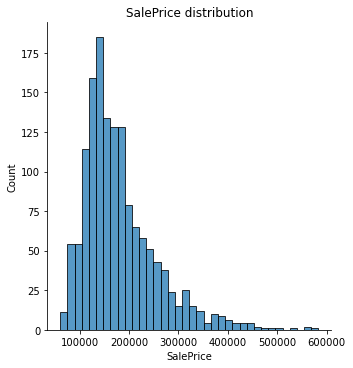

In [161]:
sns.displot(train_data, x='SalePrice')
plt.title('SalePrice distribution')
plt.show()

### Linear regression

In [162]:
LR=LinearRegression()

In [163]:
LR.fit(X_train , Y_train)
predictions = LR.predict(X_test)

In [164]:
predictions

array([153042.77992709, 198243.28058029, 110036.34909079, 145752.1423136 ,
       232018.86460191, 148539.01357944, 219685.0778689 , 171423.0478005 ,
        82063.45244869, 135249.9190197 , 212699.08834843, 127072.07634904,
       264513.81561972, 197872.4612654 , 116009.8493559 , 210402.49668462,
       149229.00571661, 244356.95575308, 327599.46852628, 209600.76392785,
        95401.80487308, 199440.4738671 , 329542.58025773, 217329.14137324,
       301231.78144487,  93473.83491392, 228616.96018031, 148725.11059941,
       160156.75963036, 204641.02292188, 100725.18038954, 185325.26304128,
       130880.88459858, 208435.46280035, 268829.36919881, 228889.75759633,
       120525.35803438, 250842.97666142, 138252.1017342 , 210723.71854738,
       210143.82850466, 153146.57517623, 246840.41440001, 140785.97622973,
       213775.15493947, 207705.7740906 , 200628.74712148, 200850.42055893,
       253252.16421104, 105268.05067502, 143412.67990302,  95712.93113015,
       227913.53322129, 1

In [165]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('Explained Variance Score:',explained_variance_score(Y_test,predictions))
print('R2:',metrics.r2_score(Y_test, predictions))

Mean Absolute Error: 19719.77285145627
Mean Squared Error: 2067806914.8657017
Root Mean Squared Error: 45473.1449854274
Explained Variance Score: 0.6281243375937845
R2: 0.6275439796446944


### Ridge regression

In [166]:
ridge=Ridge()

In [167]:
ridge.fit(X_train , Y_train)
predictions = ridge.predict(X_test)

In [168]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('Explained Variance Score:',explained_variance_score(Y_test,predictions))
print('R2:',metrics.r2_score(Y_test, predictions))

Mean Absolute Error: 19852.077056212896
Mean Squared Error: 1840352509.3131907
Root Mean Squared Error: 42899.329940142314
Explained Variance Score: 0.6691050182357872
R2: 0.6685133574407214


## Decision tree:

In [169]:
dtree= DecisionTreeRegressor()

In [170]:
params = {
    
    "max_depth":[1,3,10,14,17],
    "min_samples_leaf": [1,2, 5, 10, 12,15,20,25,30],
    "max_leaf_nodes": [5, 10, 20,30,50,70,90]
    
   
}

In [171]:
grid_search = GridSearchCV(estimator=dtree, param_grid=params)
grid_search.fit(X_train,Y_train)
tree_classifier = grid_search.best_estimator_
tree_score=grid_search.score(X_test,Y_test)
print(tree_classifier)
print(tree_score)

DecisionTreeRegressor(max_depth=17, max_leaf_nodes=50, min_samples_leaf=10)
0.702435025347501


In [172]:
tree_classifier.fit(X_train,Y_train)
y_pred_tree= tree_classifier.predict(X_test)

In [173]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_tree)))
print('Explained Variance Score:',explained_variance_score(Y_test,y_pred_tree))
print('R2:',metrics.r2_score(Y_test, y_pred_tree))

Mean Absolute Error: 25116.534348487992
Mean Squared Error: 1652025685.1300206
Root Mean Squared Error: 40645.11883523064
Explained Variance Score: 0.7033734007821978
R2: 0.702435025347501


## Random forest regressor

In [174]:
RF= RandomForestRegressor()

In [175]:
params = {
    "n_estimators": [100,150,170,180],
    "max_depth" : [15,20,60,70,90],
    "max_leaf_nodes" : [10,15,40,50,60,70,80,90]
    
    
}

In [176]:
grid_search = GridSearchCV(estimator=RF, param_grid=params)
grid_search.fit(X_train,Y_train)
RF_regressor = grid_search.best_estimator_
print(RF_regressor)
RF_score= grid_search.score(X_test,Y_test)
print(RF_score)

RandomForestRegressor(max_depth=70, max_leaf_nodes=90)
0.7907122722043847


In [177]:
RF_regressor.fit(X_train,Y_train)
y_pred_rforest= RF_regressor.predict(X_test)

In [178]:
y_pred_rforest

array([145551.28784217, 179702.87925546, 124670.69724481, 159832.97263038,
       235283.92912253, 141213.26996095, 217753.33300328, 175142.95270064,
       113864.70816673, 152408.02340644, 191346.07730886, 137551.40304651,
       248919.98657896, 193167.67497286, 128175.26041044, 165348.92464638,
       141607.96367237, 251834.45852183, 313956.03275779, 194003.99146077,
        99791.92138673, 186596.88534192, 353003.75836088, 214695.9642813 ,
       288389.95020682, 100063.40173112, 182336.48920779, 143764.43413203,
       137949.44597703, 188353.48778517, 103752.3132748 , 160698.49879775,
       134252.5339813 , 192330.98698905, 271380.78892198, 225055.97796841,
       129338.03413678, 262128.45815563, 138970.89689077, 245297.86926865,
       211222.4686408 , 161213.46833659, 242146.73132244, 141037.49694484,
       182051.54189142, 195674.38159878, 194230.28224421, 199654.06560526,
       270478.87794155, 127195.43413933, 157832.84157735, 100046.79822539,
       215911.75893734, 1

In [179]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_rforest))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_rforest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_rforest)))
print('Explained Variance Score:',explained_variance_score(Y_test,y_pred_rforest))
print('R2:',metrics.r2_score(Y_test, y_pred_rforest))

Mean Absolute Error: 18986.663684549963
Mean Squared Error: 1145300069.1383667
Root Mean Squared Error: 33842.28226846361
Explained Variance Score: 0.7939357286825821
R2: 0.7937070899621993


In [180]:
sub_data=RF_regressor.predict(test_data)

In [181]:
sample_submission = test_data[['Id']]

In [182]:
sample_submission['SalePrice']=sub_data

In [183]:
sample_submission.to_csv('sample_submission.csv', index=None)